# Real Estate Data Analysis

# Importing Various Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [2]:
df = pd.read_csv('final project dataset.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


#### If The dataset contain 'NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?' values .We need to replace with Null.

In [5]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?' ],'other',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.shape

(414, 8)

In [8]:
df.drop(columns=['No'],inplace=True)

In [9]:
df.shape

(414, 7)

#### summary statistics of numeric variable:

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.15,0.28,2012.67,2012.92,2013.17,2013.42,2013.58
X2 house age,414.0,17.71,11.39,0.00,9.02,16.10,28.15,43.80
X3 distance to the nearest MRT station,414.0,1083.89,1262.11,23.38,289.32,492.23,1454.28,6488.02
X4 number of convenience stores,414.0,4.09,2.95,0.00,1.00,4.00,6.00,10.00
X5 latitude,414.0,24.97,0.01,24.93,24.96,24.97,24.98,25.01
X6 longitude,414.0,121.53,0.02,121.47,121.53,121.54,121.54,121.57
Y house price of unit area,414.0,37.98,13.61,7.60,27.70,38.45,46.60,117.50


#### summary statistics for all variables:

In [11]:
df.describe(include="all").round(2).T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.15,0.28,2012.67,2012.92,2013.17,2013.42,2013.58
X2 house age,414.0,17.71,11.39,0.00,9.02,16.10,28.15,43.80
X3 distance to the nearest MRT station,414.0,1083.89,1262.11,23.38,289.32,492.23,1454.28,6488.02
X4 number of convenience stores,414.0,4.09,2.95,0.00,1.00,4.00,6.00,10.00
X5 latitude,414.0,24.97,0.01,24.93,24.96,24.97,24.98,25.01
X6 longitude,414.0,121.53,0.02,121.47,121.53,121.54,121.54,121.57
Y house price of unit area,414.0,37.98,13.61,7.60,27.70,38.45,46.60,117.50


In [12]:
numeric_vars = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('numeric variables: ',numeric_vars)
print('categorical variables: ',categorical_vars)

numeric variables:  ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']
categorical variables:  []


In [13]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 0
Number of numerical variables: 7


In [14]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df.isnull().sum()

(missing_values, missing_values_after)

(X1 transaction date                       0
 X2 house age                              0
 X3 distance to the nearest MRT station    0
 X4 number of convenience stores           0
 X5 latitude                               0
 X6 longitude                              0
 Y house price of unit area                0
 dtype: int64,
 X1 transaction date                       0
 X2 house age                              0
 X3 distance to the nearest MRT station    0
 X4 number of convenience stores           0
 X5 latitude                               0
 X6 longitude                              0
 Y house price of unit area                0
 dtype: int64)

In [15]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
X1 transaction date,0,0.0
X2 house age,0,0.0
X3 distance to the nearest MRT station,0,0.0
X4 number of convenience stores,0,0.0
X5 latitude,0,0.0
X6 longitude,0,0.0
Y house price of unit area,0,0.0


In [16]:
df[df.duplicated(keep=False)]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(414, 7)

In [19]:
df.nunique().sort_values()

X4 number of convenience stores            11
X1 transaction date                        12
X6 longitude                              232
X5 latitude                               234
X2 house age                              236
X3 distance to the nearest MRT station    259
Y house price of unit area                270
dtype: int64

# UNIVARIATE ANALYSIS

### Distribution of House Price

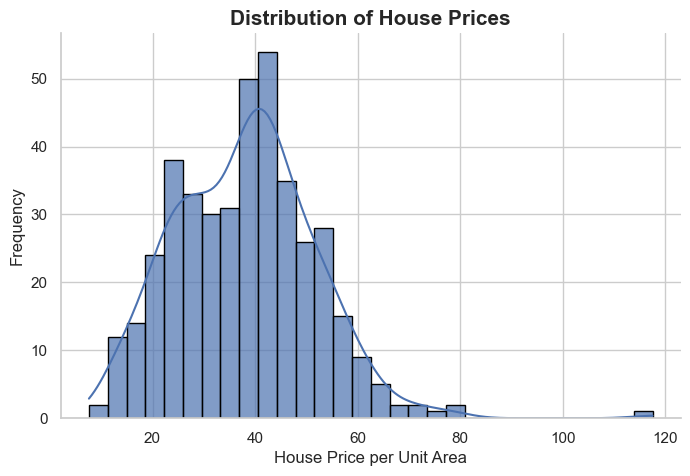

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
# Histogram with KDE in ONE chart
sns.histplot(
    df['Y house price of unit area'],
    bins=30,
    kde=True,
    edgecolor='black',
    alpha=0.7)

plt.title('Distribution of House Prices', fontsize=15, fontweight='bold')
plt.xlabel('House Price per Unit Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sns.despine()
plt.show()

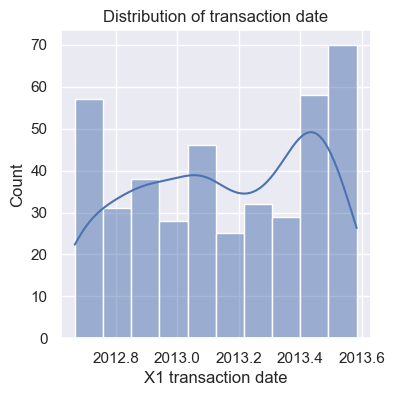

In [20]:
plt.figure(figsize=[4,4])
sns.histplot(df['X1 transaction date'],kde=True)
plt.title('Distribution of transaction date')
plt.show()

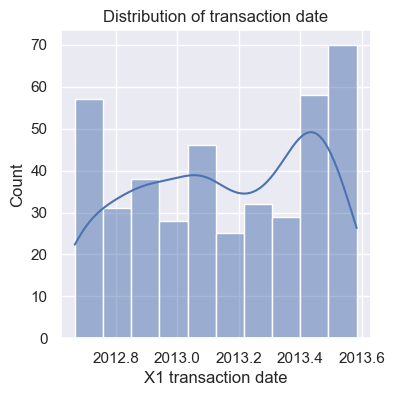

In [21]:
plt.figure(figsize=[4,4])
sns.histplot(df['X1 transaction date'],kde=True)
plt.title('Distribution of transaction date')
plt.show()

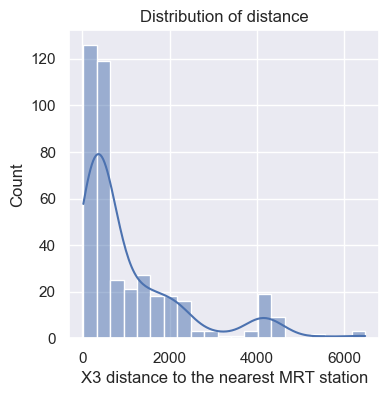

In [22]:
plt.figure(figsize=[4,4])
sns.histplot(df['X3 distance to the nearest MRT station'],kde=True)
plt.title('Distribution of distance')
plt.show()

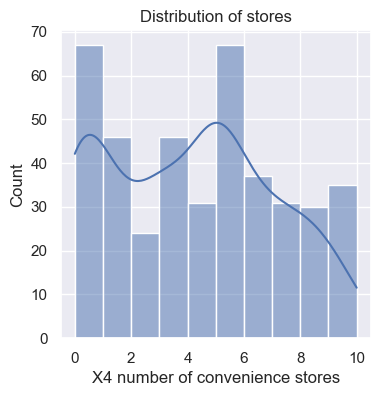

In [23]:
plt.figure(figsize=[4,4])
sns.histplot(df['X4 number of convenience stores'],kde=True)
plt.title('Distribution of stores')
plt.show()

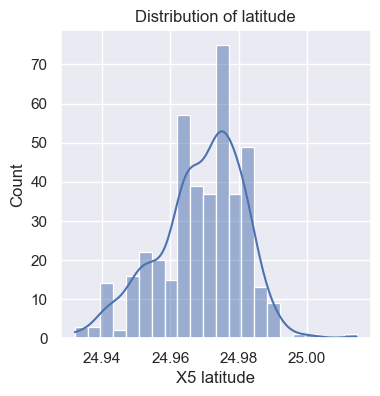

In [24]:
plt.figure(figsize=[4,4])
sns.histplot(df['X5 latitude'],kde=True)
plt.title('Distribution of latitude')
plt.show()

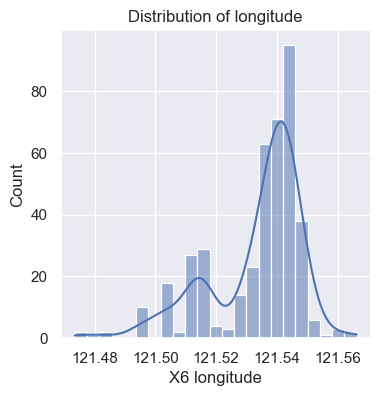

In [25]:
plt.figure(figsize=[4,4])
sns.histplot(df['X6 longitude'],kde=True)
plt.title('Distribution of longitude')
plt.show()

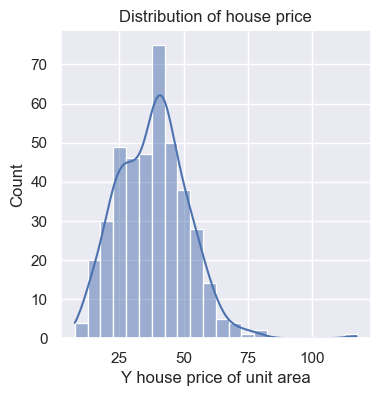

In [26]:
plt.figure(figsize=[4,4])
sns.histplot(df['Y house price of unit area'],kde=True)
plt.title('Distribution of house price')
plt.show()

### Box plot

In [27]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

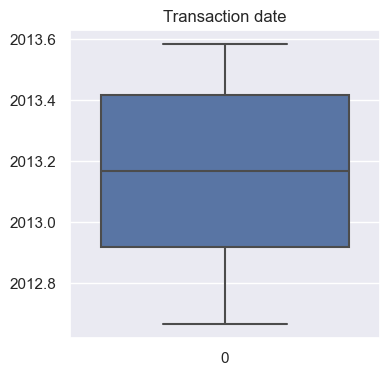

In [28]:
plt.figure(figsize=[4,4])
sns.boxplot(df["X1 transaction date"])
plt.title('Transaction date')
plt.show()

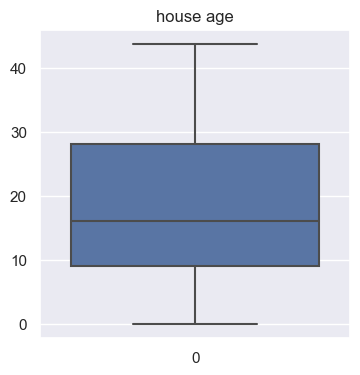

In [29]:
plt.figure(figsize=[4,4])
sns.boxplot(df['X2 house age'])
plt.title('house age')
plt.show()

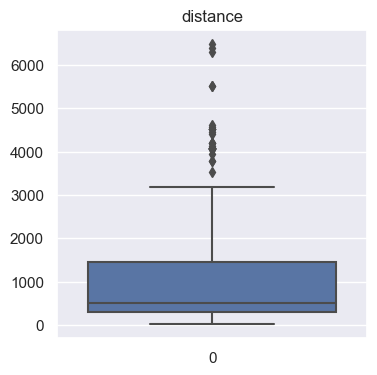

In [30]:
plt.figure(figsize=[4,4])
sns.boxplot(df['X3 distance to the nearest MRT station'])
plt.title('distance')
plt.show()

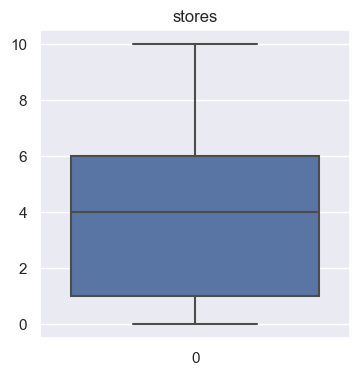

In [31]:
plt.figure(figsize=[4,4])
sns.boxplot(df['X4 number of convenience stores'])
plt.title('stores')
plt.show()

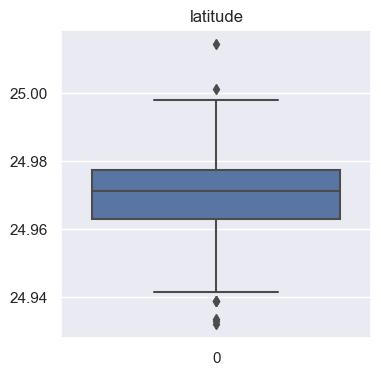

In [32]:
plt.figure(figsize=[4,4])
sns.boxplot(df['X5 latitude'])
plt.title('latitude')
plt.show()

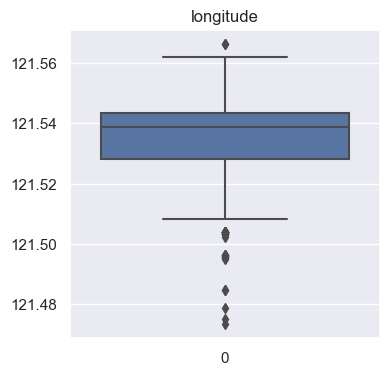

In [33]:
plt.figure(figsize=[4,4])
sns.boxplot(df['X6 longitude'])
plt.title('longitude')
plt.show()

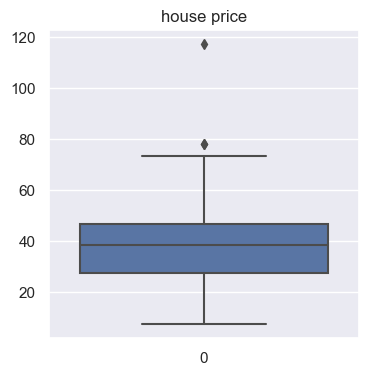

In [34]:
plt.figure(figsize=[4,4])
sns.boxplot(df['Y house price of unit area'])
plt.title('house price')
plt.show()

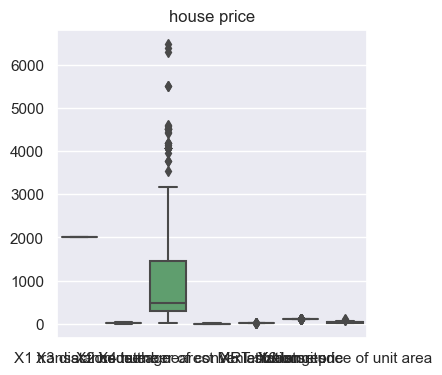

In [35]:
plt.figure(figsize=[4,4])
sns.boxplot(df)
plt.title('house price')
plt.show()

# Bivariate Analysis

# MRT Station Vs House Price

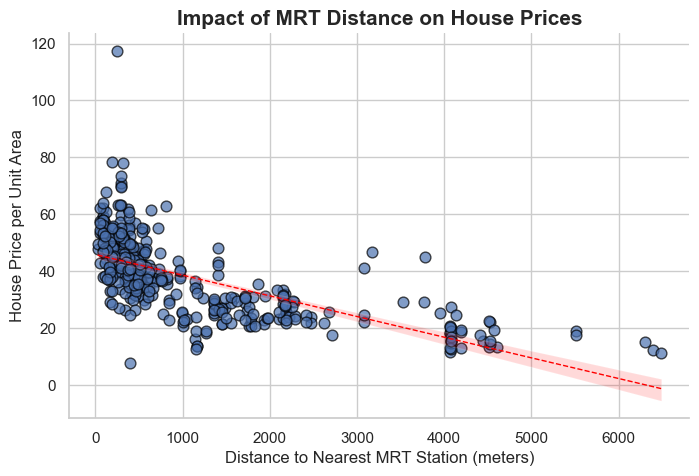

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
# Single plot: scatter + regression line together
sns.regplot(
    x=df['X3 distance to the nearest MRT station'],
    y=df['Y house price of unit area'],
    scatter_kws={
        's': 60,
        'alpha': 0.7,
        'edgecolor': 'black'
    },
    line_kws={
        'color': 'red',
        'linewidth': 1,
        'linestyle': '--'
    })
plt.title('Impact of MRT Distance on House Prices', fontsize=15, fontweight='bold')
plt.xlabel('Distance to Nearest MRT Station (meters)', fontsize=12)
plt.ylabel('House Price per Unit Area', fontsize=12)
sns.despine()
plt.show()

## House Age Vs Price

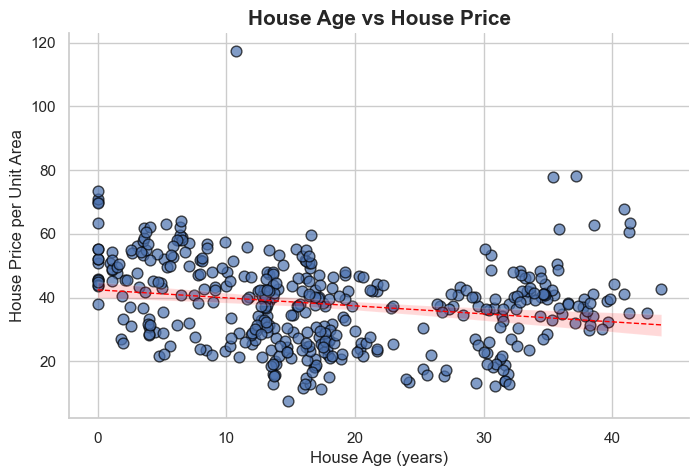

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.regplot(
    x=df['X2 house age'],
    y=df['Y house price of unit area'],
    scatter_kws={
        's': 60,
        'alpha': 0.7,
        'edgecolor': 'black'
    },
    line_kws={
        'color': 'red',
        'linewidth': 1,
        'linestyle': '--'
    })

plt.title('House Age vs House Price', fontsize=15, fontweight='bold')
plt.xlabel('House Age (years)', fontsize=12)
plt.ylabel('House Price per Unit Area', fontsize=12)

sns.despine()
plt.show()

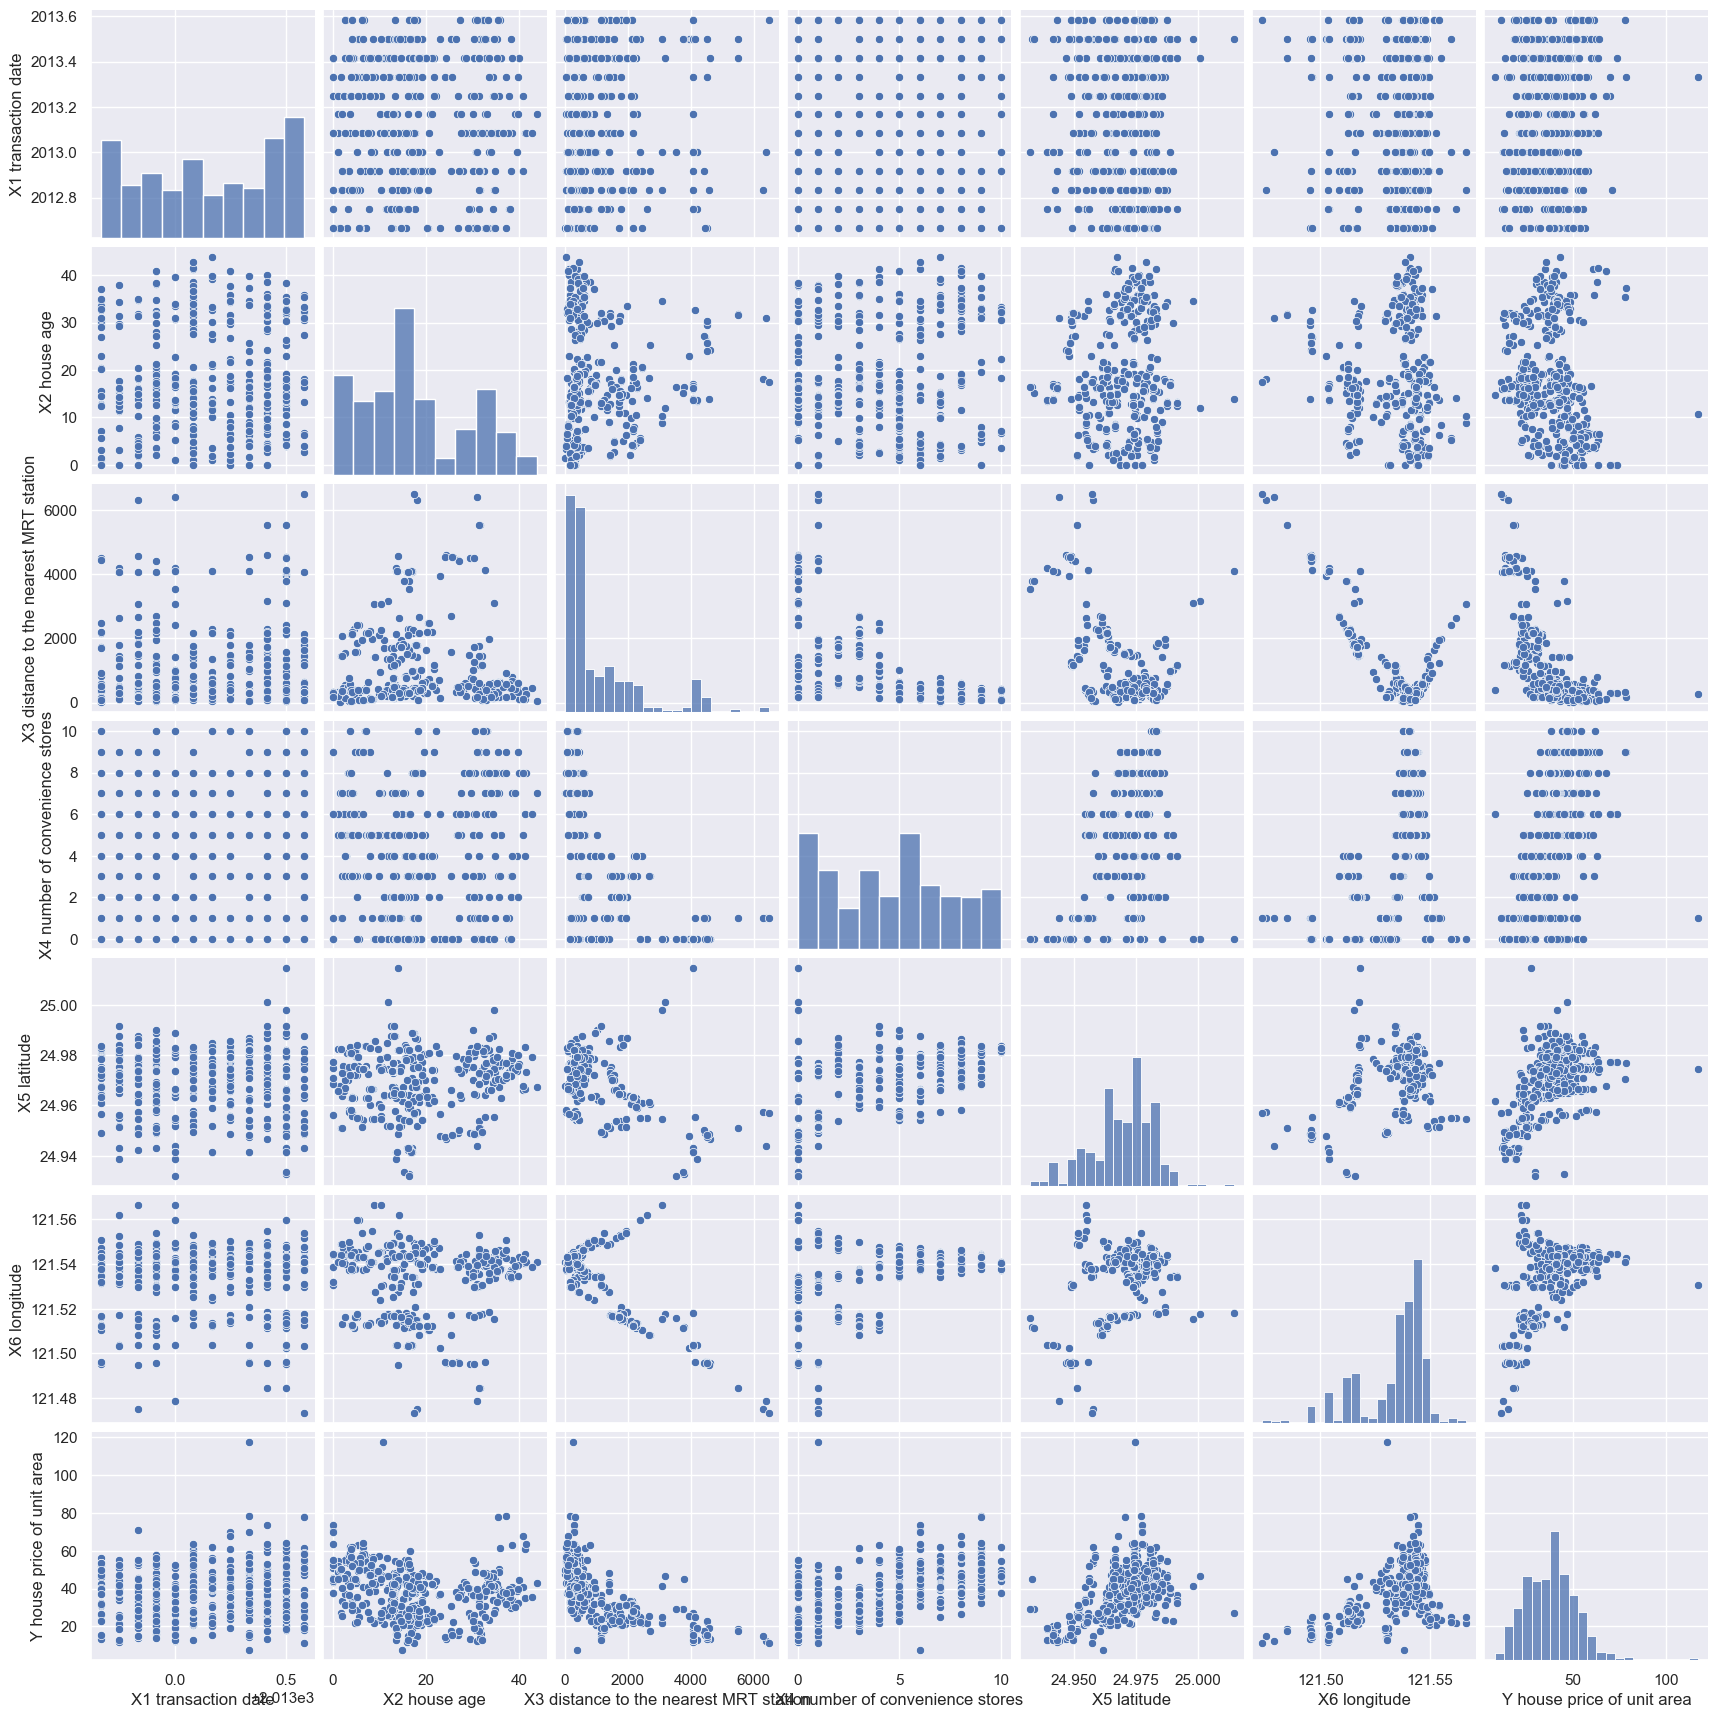

In [36]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

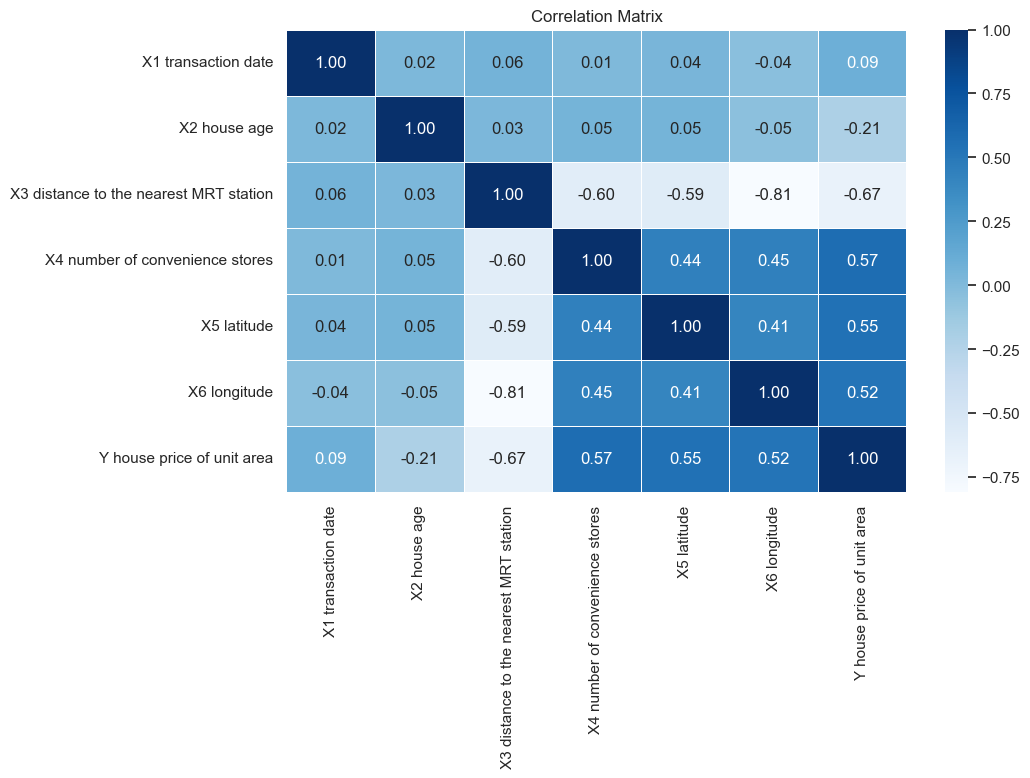

In [37]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [38]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [39]:
x = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle = True,random_state=42)

In [41]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (331, 6) (331,)
Testing set shape: (83, 6) (83,)


In [42]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [43]:
models = {
            "Linear Regression" : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "k-Neighbors Regression" : KNeighborsRegressor(),
            "Decision Tree" : DecisionTreeRegressor(),
            "Random Forest Regressor" : RandomForestRegressor(n_estimators = 100, random_state = 0),
            "AdaBoost Regressor" :AdaBoostRegressor(),
            
          
        }

In [44]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            #Make prediction:
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            #Evaluate Train and Test dataset :

            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
            model_name = list(models.keys())[i]
           
            print(model_name)

            print("Model Performance for Training set :")

            print('Root Mean Squared Error :',model_train_rmse)
            print("Mean Absolute Error : ", model_train_mae)
            print("R2 Score : ", model_train_r2)

            print("----------------------------------------------------")
            
            print("Model Performance for Testing set :")

            print('Root Mean Squared Error : ', model_test_rmse)
            print('Mean Absolute Error :  ',{model_test_mae})
            print('R2 Score : ', {model_test_r2})
            print()

Linear Regression
Model Performance for Training set :
Root Mean Squared Error : 9.116659612434574
Mean Absolute Error :  6.339699267157078
R2 Score :  0.5581197274607109
----------------------------------------------------
Model Performance for Testing set :
Root Mean Squared Error :  7.314753524521575
Mean Absolute Error :   {5.305355690073943}
R2 Score :  {0.6810580555096022}

Lasso
Model Performance for Training set :
Root Mean Squared Error : 9.56497150403844
Mean Absolute Error :  6.712006546809151
R2 Score :  0.5135922405618927
----------------------------------------------------
Model Performance for Testing set :
Root Mean Squared Error :  7.7174882014971615
Mean Absolute Error :   {5.70124115383853}
R2 Score :  {0.6449707031292082}

Ridge
Model Performance for Training set :
Root Mean Squared Error : 9.397362860661138
Mean Absolute Error :  6.5933125528790955
R2 Score :  0.5304896973530088
----------------------------------------------------
Model Performance for Testing set 

In [45]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [46]:
y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

In [47]:
max(y)

117.5

In [48]:
min(y)

7.6

In [49]:
x_train.shape


(331, 6)

In [50]:
price_bins = [0, 40,80,120]  # Example bin edges (low, medium, high price)
price_labels = ['Low', 'Medium', 'High']  # Labels for the bins

# Discretize the `Y house price of unit area` into categories
df['Price_Category'] = pd.cut(df['Y house price of unit area'], bins=price_bins, labels=price_labels, include_lowest=True)

# Step 2: Split data into features and target variable
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]  # Features
y = df['Price_Category']  # Discretized target variable (Price Category)

# Step 3: Train a classifier (e.g., Decision Tree Classifier)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=price_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[40  9  0]
 [10 24  0]
 [ 0  0  0]]


# DT Training dataset

In [51]:
x_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, x_pred)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, x_pred)))

[[  1   0   0]
 [  0 175   0]
 [  0   1 154]]
ACCURACY 0.9970


In [52]:
#Prediction for testing data
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_test, y_pred)))

[[40  9]
 [10 24]]
ACCURACY 0.7711


In [53]:
from sklearn.tree import plot_tree


In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Low       0.80      0.82      0.81        49
      Medium       0.73      0.71      0.72        34

    accuracy                           0.77        83
   macro avg       0.76      0.76      0.76        83
weighted avg       0.77      0.77      0.77        83



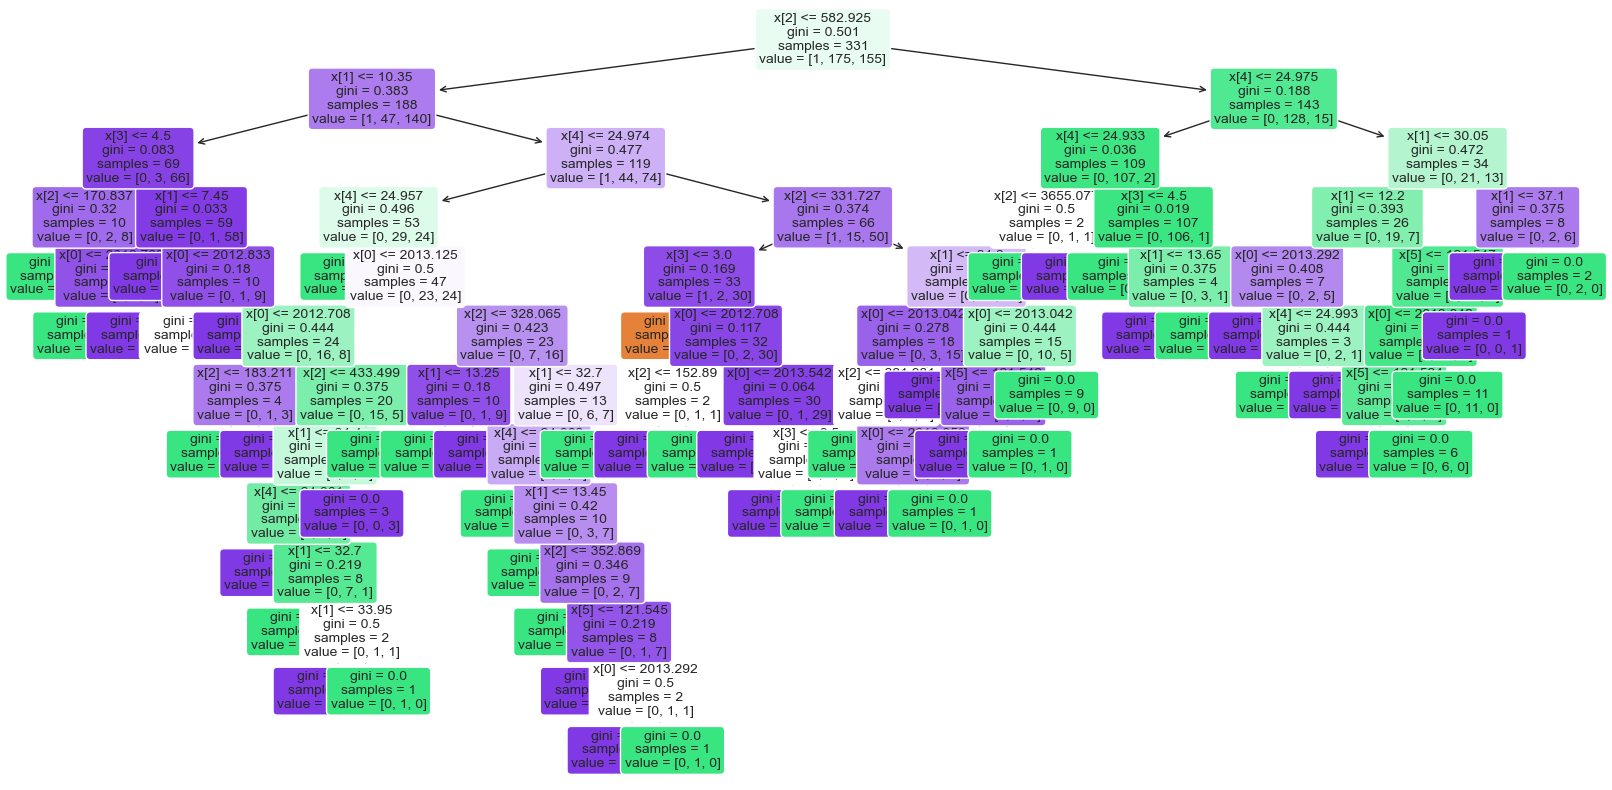

In [55]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, rounded=True, fontsize=10)
plt.show()

# Random forest

In [57]:
model_rf =RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=8, criterion="entropy", random_state=0)
model_rf.fit(X_train, y_train)
# Calculate training set accuracy
x_pred_rf = model_rf.predict(X_train)
cm = confusion_matrix(y_train, x_pred_rf)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, x_pred_rf)))

[[  0   0   1]
 [  0 149  26]
 [  0  22 133]]
ACCURACY 0.8520


In [58]:
y_pred1 = model_rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred1)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_test, y_pred1)))

[[42  7]
 [ 5 29]]
ACCURACY 0.8554


In [59]:
accuracy = accuracy_score(y_test, y_pred1)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 85.54%


In [60]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         Low       0.89      0.86      0.88        49
      Medium       0.81      0.85      0.83        34

    accuracy                           0.86        83
   macro avg       0.85      0.86      0.85        83
weighted avg       0.86      0.86      0.86        83



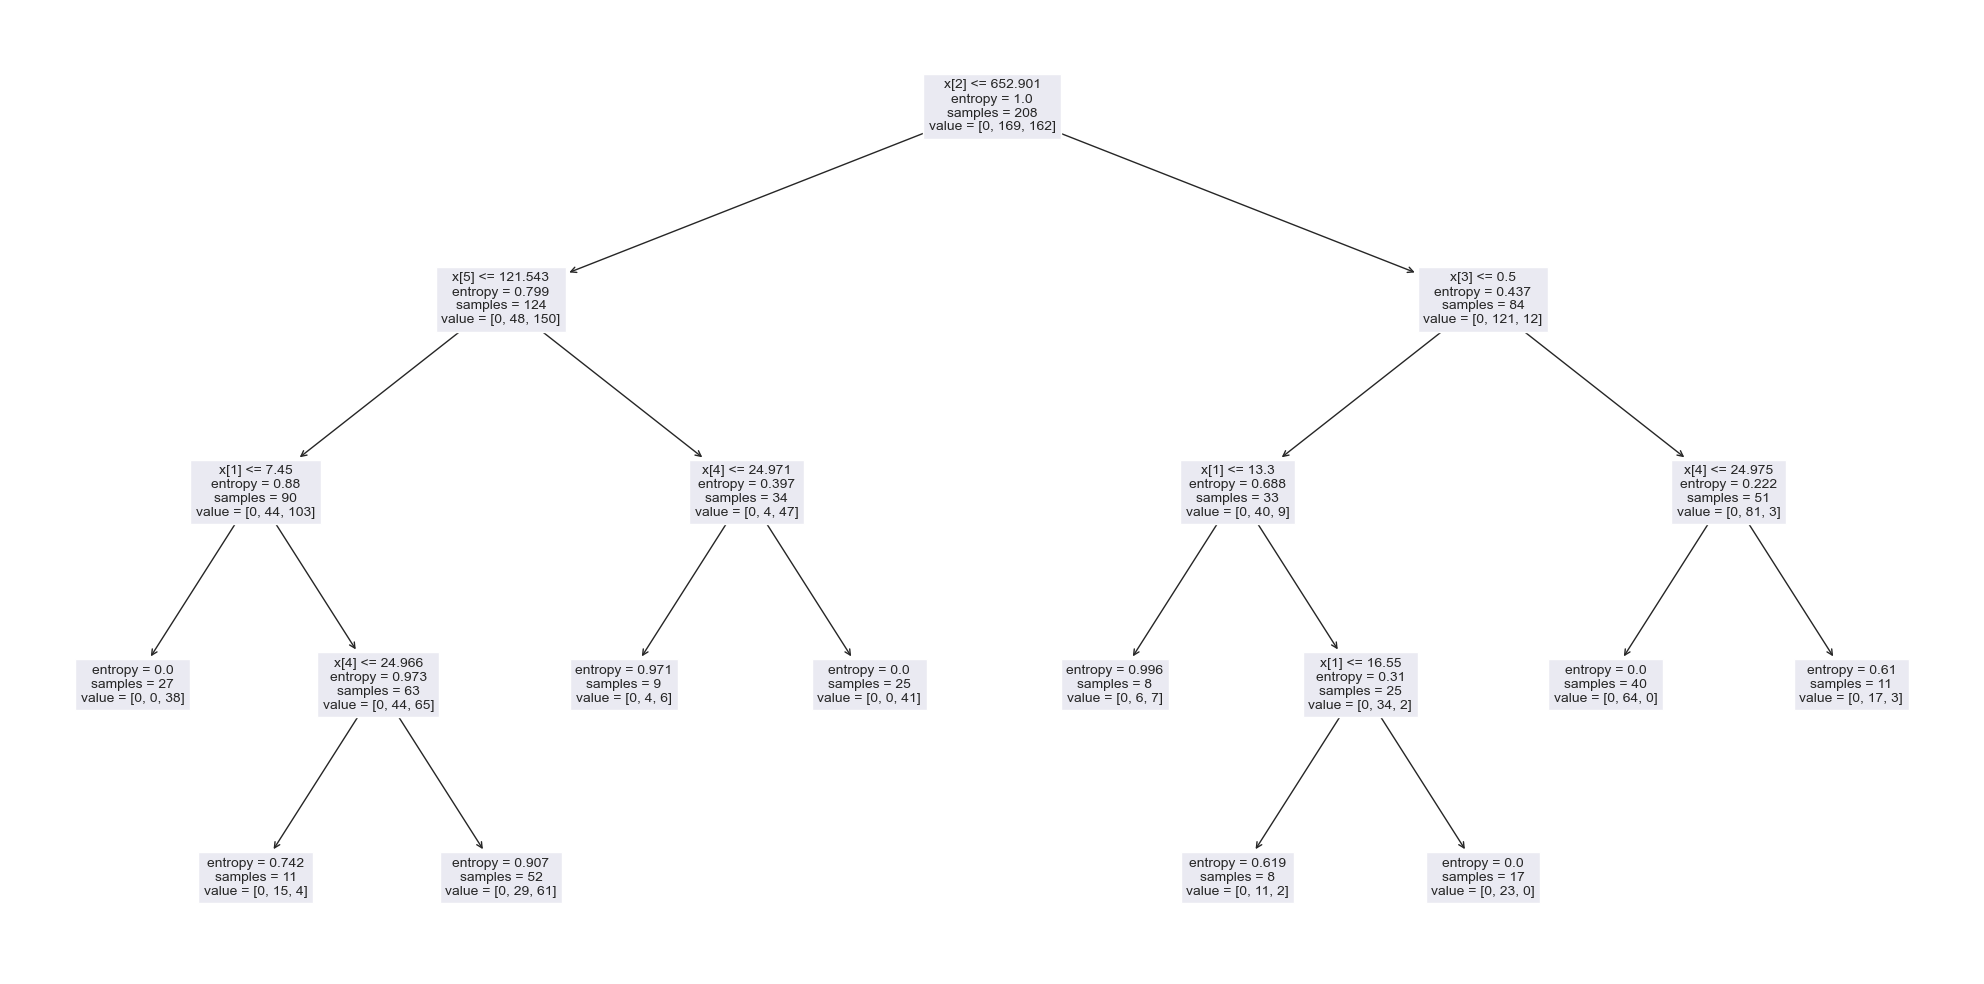

In [61]:
tree_to_plot = model_rf.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_to_plot, fontsize=10)
plt.tight_layout()
plt.show()

# KNN

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
x_pred_knn = knn.predict(X_train)
cm = confusion_matrix(y_train, x_pred_knn)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, x_pred_knn)))

[[  1   0   0]
 [  0 155  20]
 [  0  18 137]]
ACCURACY 0.8852


In [64]:
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_test, y_pred_knn)))

[[42  7]
 [ 8 26]]
ACCURACY 0.8193


In [65]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         Low       0.84      0.86      0.85        49
      Medium       0.79      0.76      0.78        34

    accuracy                           0.82        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.82      0.82      0.82        83

